In [1]:
import pandas as pd

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [58]:

#On a scale of 1-5, how would you rate your mood? (1 being sad, depressed, and down; 3 being in the middle, not happy or sad; 5 being happy, high, awesome, great).
data_1 = pd.read_excel("/Users/macbookretina/Desktop/Session_Entrance_Survey2021-07-22_14_48_10.xlsx", 
                       usecols = [0,1], parse_dates=True, 
                       names=['Submission Date', 'Mood Ratings'],
                       dtype={'Submission Date': str, 'Mood Ratings': int})

#mood_data_1 = data_1.sort_values('Mood Ratings')
mood_data_1 = data_1
#mood_data_1 = mood_data_1.dropna()
mood_data_1["Group"] = 1
mood_data_1

,Submission Date,Mood Ratings,Group
0,2021/06/13 17:45:24,1,1
1,2021/06/13 17:45:19,2,1
2,2021/05/10 18:05:54,5,1
3,2021/05/10 18:04:02,4,1
4,2021/05/10 18:03:59,3,1
...,...,...,...
134,2020/07/24 17:05:33,1,1
135,2020/07/24 17:05:32,1,1
136,2020/07/17 18:08:39,5,1
137,2020/07/17 17:04:51,4,1


In [59]:
#art circle

#On a scale of 1-5, how would you rate your mood? (1 being sad, depressed, and down; 3 being in the middle, not happy or sad; 5 being happy, high, awesome, great).
data_2 = pd.read_excel("/Users/macbookretina/Desktop/Session Entrance Survey - Art Circle (Responses).xlsx", 
                       usecols = [0,1], parse_dates=True, 
                       names=['Submission Date', 'Mood Ratings'],
                       dtype={'Submission Date': str, 'Mood Ratings': int})

#mood_data_2 = data_2.sort_values('Mood Ratings')
mood_data_2 = data_2
#mood_data_1 = mood_data_1.dropna()
mood_data_2["Group"] = 2
mood_data_2

,Submission Date,Mood Ratings,Group
0,2021-05-02 22:36:39.875000,3,2
1,2021-05-02 22:36:40.552000,3,2
2,2021-05-02 22:38:15.034000,4,2
3,2021-05-09 22:32:50.631000,4,2
4,2021-05-09 22:33:12.456000,3,2
5,2021-05-09 22:34:02.184000,3,2
6,2021-05-09 22:36:31.199000,4,2
7,2021-05-16 22:32:03.953000,1,2
8,2021-05-16 22:35:22.201000,3,2
9,2021-05-23 22:33:46.881000,4,2


In [60]:
#queer circle

#On a scale of 1-5, how would you rate your mood? (1 being sad, depressed, and down; 3 being in the middle, not happy or sad; 5 being happy, high, awesome, great).
data_3 = pd.read_excel("/Users/macbookretina/Desktop/Exit Survey - Queer Circle (Responses).xlsx", 
                       usecols = [0,1], parse_dates=True, 
                       names=['Submission Date', 'Mood Ratings'],
                       dtype={'Submission Date': str, 'Mood Ratings': int})

#mood_data_3 = data_3.sort_values('Mood Ratings')
mood_data_3 = data_3
#mood_data_1 = mood_data_1.dropna()
mood_data_3["Group"] = 3
mood_data_3

,Submission Date,Mood Ratings,Group
0,2021-05-01 19:26:24.926000,2,3
1,2021-05-04 00:07:17.370000,3,3
2,2021-05-04 00:08:24.891000,3,3
3,2021-05-04 18:56:25.749000,4,3
4,2021-05-08 20:11:17.968000,4,3
5,2021-05-11 00:02:13.220000,4,3
6,2021-05-11 00:02:42.499000,3,3
7,2021-05-11 04:01:03.282000,3,3
8,2021-05-29 20:03:57.524000,4,3


In [61]:


#On a scale of 1-5, how would you rate your mood? (1 being sad, depressed, and down; 3 being in the middle, not happy or sad; 5 being happy, high, awesome, great).
data_4 = pd.read_excel("/Users/macbookretina/Desktop/Session_Exit_Survey2021-07-22_14_51_18.xlsx", 
                       usecols = [0,1], parse_dates=True, 
                       names=['Submission Date', 'Mood Ratings'],
                       dtype={'Submission Date': str, 'Mood Ratings': int})

#mood_data_4 = data_4.sort_values('Mood Ratings')
mood_data_4 = data_4
#mood_data_1 = mood_data_1.dropna()
mood_data_4["Group"] = 4
mood_data_4

,Submission Date,Mood Ratings,Group
0,2021/06/13 19:18:05,5,4
1,2021/06/13 19:18:01,3,4
2,2021/05/10 19:32:28,5,4
3,2021/05/10 19:20:49,5,4
4,2021/05/10 19:19:39,5,4
...,...,...,...
113,2020/07/24 18:29:04,5,4
114,2020/07/24 18:28:47,5,4
115,2020/07/17 18:09:29,5,4
116,2020/07/17 18:08:26,4,4


In [62]:
#art circle

#On a scale of 1-5, how would you rate your mood? (1 being sad, depressed, and down; 3 being in the middle, not happy or sad; 5 being happy, high, awesome, great).
data_5 = pd.read_excel("/Users/macbookretina/Desktop/Session Exit Survey - Art Circle (Responses).xlsx", 
                       usecols = [0,1], parse_dates=True, 
                       names=['Submission Date', 'Mood Ratings'],
                       dtype={'Submission Date': str, 'Mood Ratings': int})

#mood_data_5 = data_5.sort_values('Mood Ratings')
mood_data_5 = data_5
#mood_data_1 = mood_data_1.dropna()
mood_data_5["Group"] = 5
mood_data_5

,Submission Date,Mood Ratings,Group
0,2021-05-03 00:32:17.294000,3,5
1,2021-05-03 00:32:29.723000,3,5
2,2021-05-03 00:32:41.258000,4,5
3,2021-05-10 00:24:20.862000,5,5
4,2021-05-10 00:24:23.035000,3,5
5,2021-05-10 00:24:23.774000,4,5
6,2021-05-10 00:24:40.290000,4,5
7,2021-05-17 00:29:46.456000,3,5
8,2021-05-17 00:29:58.883000,3,5
9,2021-05-24 00:22:27.680000,4,5


In [63]:
#queer circle

#On a scale of 1-5, how would you rate your mood? (1 being sad, depressed, and down; 3 being in the middle, not happy or sad; 5 being happy, high, awesome, great).
data_6 = pd.read_excel("/Users/macbookretina/Desktop/Session Entrance Survey - Queer Circle (Responses).xlsx", 
                       usecols = [0,1], parse_dates=True, 
                       names=['Submission Date', 'Mood Ratings'],
                       dtype={'Submission Date': str, 'Mood Ratings': int})

#mood_data_6 = data_6.sort_values('Mood Ratings')
mood_data_6 = data_6
#mood_data_1 = mood_data_1.dropna()
mood_data_6["Group"] = 6
mood_data_6

,Submission Date,Mood Ratings,Group
0,2021-05-01 18:39:07.009000,3,6
1,2021-05-01 18:58:50.410000,3,6
2,2021-05-03 22:35:13.212000,2,6
3,2021-05-03 22:36:09.504000,4,6
4,2021-05-03 22:36:10.931000,3,6
5,2021-05-08 18:38:38.782000,3,6
6,2021-05-08 18:38:39.203000,3,6
7,2021-05-10 22:36:48.577000,2,6
8,2021-05-10 22:36:49.691000,3,6
9,2021-05-10 22:37:01.403000,3,6


In [85]:
#append

data_full_1 = mood_data_1.append(mood_data_2)

data_full_2 = data_full_1.append(mood_data_3)

data_full_3 = data_full_2.append(mood_data_4)

data_full_4 = data_full_3.append(mood_data_5)

data_full = data_full_4.append(mood_data_6)

data_full.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 14
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Submission Date  314 non-null    object
 1   Mood Ratings     314 non-null    int64 
 2   Group            314 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 9.8+ KB


In [108]:
data_full["index"] = 0

for i in range(314):
    data_full.iloc[i, data_full.columns.get_loc('index')] = i
    
    
data_full.set_index('index')

,Submission Date,Mood Ratings,Group
index,,,
0,2021/06/13 17:45:24,1,1
1,2021/06/13 17:45:19,2,1
2,2021/05/10 18:05:54,5,1
3,2021/05/10 18:04:02,4,1
4,2021/05/10 18:03:59,3,1
...,...,...,...
309,2021-05-17 22:37:01.429000,4,6
310,2021-05-17 23:22:26.567000,4,6
311,2021-05-29 20:04:06.427000,4,6


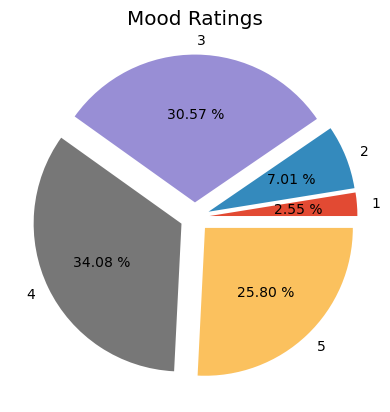

In [118]:
one = data_full.loc[data_full["Mood Ratings"] == 1].count()[0]
two = data_full.loc[data_full["Mood Ratings"] == 2].count()[0]
three = data_full.loc[data_full["Mood Ratings"] == 3].count()[0]
four = data_full.loc[data_full["Mood Ratings"] == 4].count()[0]
five = data_full.loc[data_full["Mood Ratings"] == 5].count()[0]

plt.style.use("ggplot")

labels = [1,2,3,4,5]

explode = (.1,.1,.1,.1,.1)

plt.pie([one, two, three, four, five], labels = labels, autopct = "%.2f %%",explode = explode)

plt.title("Mood Ratings")

plt.show()